In [67]:
import pandas as pd
import numpy as nm

df=pd.read_csv('fraud_oracle.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AccidentArea          15419 non-null  object
 1   Sex                   15419 non-null  object
 2   MaritalStatus         15419 non-null  object
 3   Age                   15419 non-null  int64 
 4   Fault                 15419 non-null  object
 5   PolicyType            15419 non-null  object
 6   VehicleCategory       15419 non-null  object
 7   VehiclePrice          15419 non-null  object
 8   FraudFound_P          15419 non-null  int64 
 9   PolicyNumber          15419 non-null  int64 
 10  RepNumber             15419 non-null  int64 
 11  Deductible            15419 non-null  int64 
 12  DriverRating          15419 non-null  int64 
 13  Days_Policy_Accident  15419 non-null  object
 14  Days_Policy_Claim     15419 non-null  object
 15  PastNumberOfClaims    15419 non-null

In [69]:
df

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,DaysToClaim
0,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,6
1,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,5
2,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,13
3,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,27
4,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Urban,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,4
15415,Urban,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,8
15416,Rural,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,8
15417,Urban,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,10


In [23]:
df.head()

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,DaysToClaim
0,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,6
1,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,5
2,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,13
3,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,27
4,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,15


In [70]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [71]:
from sklearn.preprocessing import LabelEncoder
#sex
label_encoder_sex = LabelEncoder()
encoded_column = label_encoder_sex.fit_transform(df['Sex'])
df['Sex'] = encoded_column

In [30]:
df

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,DaysToClaim
0,Urban,0,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,6
1,Urban,1,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,5
2,Urban,1,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,13
3,Rural,1,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,27
4,Urban,0,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Urban,1,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,4
15415,Urban,1,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,8
15416,Rural,1,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,8
15417,Urban,0,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,10


In [72]:
#AccidentArea
label_encoder_aa = LabelEncoder()
encoded_column = label_encoder_aa.fit_transform(df['AccidentArea'])
df['AccidentArea'] = encoded_column

#MaritalStatus
label_encoder_ms = LabelEncoder()
encoded_column = label_encoder_ms.fit_transform(df['MaritalStatus'])
df['MaritalStatus'] = encoded_column

#Fault
label_encoder_f = LabelEncoder()
encoded_column = label_encoder_f.fit_transform(df['Fault'])
df['Fault'] = encoded_column

#PolicyType
label_encoder_pt = LabelEncoder()
encoded_column = label_encoder_pt.fit_transform(df['PolicyType'])
df['PolicyType'] = encoded_column

#VehicleCategory
label_encoder_vc = LabelEncoder()
encoded_column = label_encoder_vc.fit_transform(df['VehicleCategory'])
df['VehicleCategory'] = encoded_column

#VehiclePrice
label_encoder_vp = LabelEncoder()
encoded_column = label_encoder_vp.fit_transform(df['VehiclePrice'])
df['VehiclePrice'] = encoded_column

#Days_Policy_Accident
label_encoder_dpa = LabelEncoder()
encoded_column = label_encoder_dpa.fit_transform(df['Days_Policy_Accident'])
df['Days_Policy_Accident'] = encoded_column

#Days_Policy_Claim
label_encoder_dpc = LabelEncoder()
encoded_column = label_encoder_dpc.fit_transform(df['Days_Policy_Claim'])
df['Days_Policy_Claim'] = encoded_column

#PastNumberOfClaims
label_encoder_pnc = LabelEncoder()
encoded_column = label_encoder_pnc.fit_transform(df['PastNumberOfClaims'])
df['PastNumberOfClaims'] = encoded_column

#AgeOfVehicle
label_encoder_aov = LabelEncoder()
encoded_column = label_encoder_aov.fit_transform(df['AgeOfVehicle'])
df['AgeOfVehicle'] = encoded_column

#AgeOfPolicyHolder
label_encoder_aoph = LabelEncoder()
encoded_column = label_encoder_aoph.fit_transform(df['AgeOfPolicyHolder'])
df['AgeOfPolicyHolder'] = encoded_column

#PoliceReportFiled
label_encoder_prf = LabelEncoder()
encoded_column = label_encoder_prf.fit_transform(df['PoliceReportFiled'])
df['PoliceReportFiled'] = encoded_column

#WitnessPresent
label_encoder_witp = LabelEncoder()
encoded_column = label_encoder_witp.fit_transform(df['WitnessPresent'])
df['WitnessPresent'] = encoded_column

#AgentType
label_encoder_agt = LabelEncoder()
encoded_column = label_encoder_agt.fit_transform(df['AgentType'])
df['AgentType'] = encoded_column

#NumberOfSuppliments
label_encoder_nos = LabelEncoder()
encoded_column = label_encoder_nos.fit_transform(df['NumberOfSuppliments'])
df['NumberOfSuppliments'] = encoded_column

#AddressChange_Claim
label_encoder_acc = LabelEncoder()
encoded_column = label_encoder_acc.fit_transform(df['AddressChange_Claim'])
df['AddressChange_Claim'] = encoded_column

#NumberOfCars
label_encoder_noc = LabelEncoder()
encoded_column = label_encoder_noc.fit_transform(df['NumberOfCars'])
df['NumberOfCars'] = encoded_column

#BasePolicy
label_encoder_bp = LabelEncoder()
encoded_column = label_encoder_bp.fit_transform(df['BasePolicy'])
df['BasePolicy'] = encoded_column

In [73]:
# Access the mapping of categorical values to numeric labels
label_mapping = dict(zip(label_encoder_sex.classes_, label_encoder_sex.transform(label_encoder_sex.classes_)))

# Print the mapping
print("Label Encoding Mapping:")
for category, label in label_mapping.items():
    print(f"{category}: {label}")

Label Encoding Mapping:
Female: 0
Male: 1


In [74]:
df

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,DaysToClaim
0,1,0,2,21,0,5,1,5,0,1,...,3,0,0,0,3,0,2,1994,2,6
1,1,1,2,34,0,4,1,5,0,2,...,4,1,0,0,3,3,0,1994,1,5
2,1,1,1,47,0,4,1,5,0,3,...,6,0,0,0,3,3,0,1994,1,13
3,0,1,1,65,1,2,1,0,0,4,...,7,1,0,0,2,3,0,1994,2,27
4,1,0,2,27,1,4,1,5,0,5,...,4,0,0,0,3,3,0,1994,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,1,1,1,35,0,1,0,0,1,15416,...,4,0,0,0,3,3,0,1996,1,4
15415,1,1,1,30,0,2,1,1,0,15417,...,4,0,0,0,2,3,2,1996,2,8
15416,0,1,2,24,0,1,0,0,1,15418,...,3,0,0,0,0,3,0,1996,1,8
15417,1,0,1,34,1,0,0,0,0,15419,...,4,0,0,0,2,3,0,1996,0,10


In [75]:
# Access the mapping of categorical values to numeric labels
label_mapping = dict(zip(label_encoder_nos.classes_, label_encoder_nos.transform(label_encoder_nos.classes_)))

# Print the mapping
print("Label Encoding Mapping:")
for category, label in label_mapping.items():
    print(f"{category}: {label}")

Label Encoding Mapping:
1 to 2: 0
3 to 5: 1
more than 5: 2
none: 3


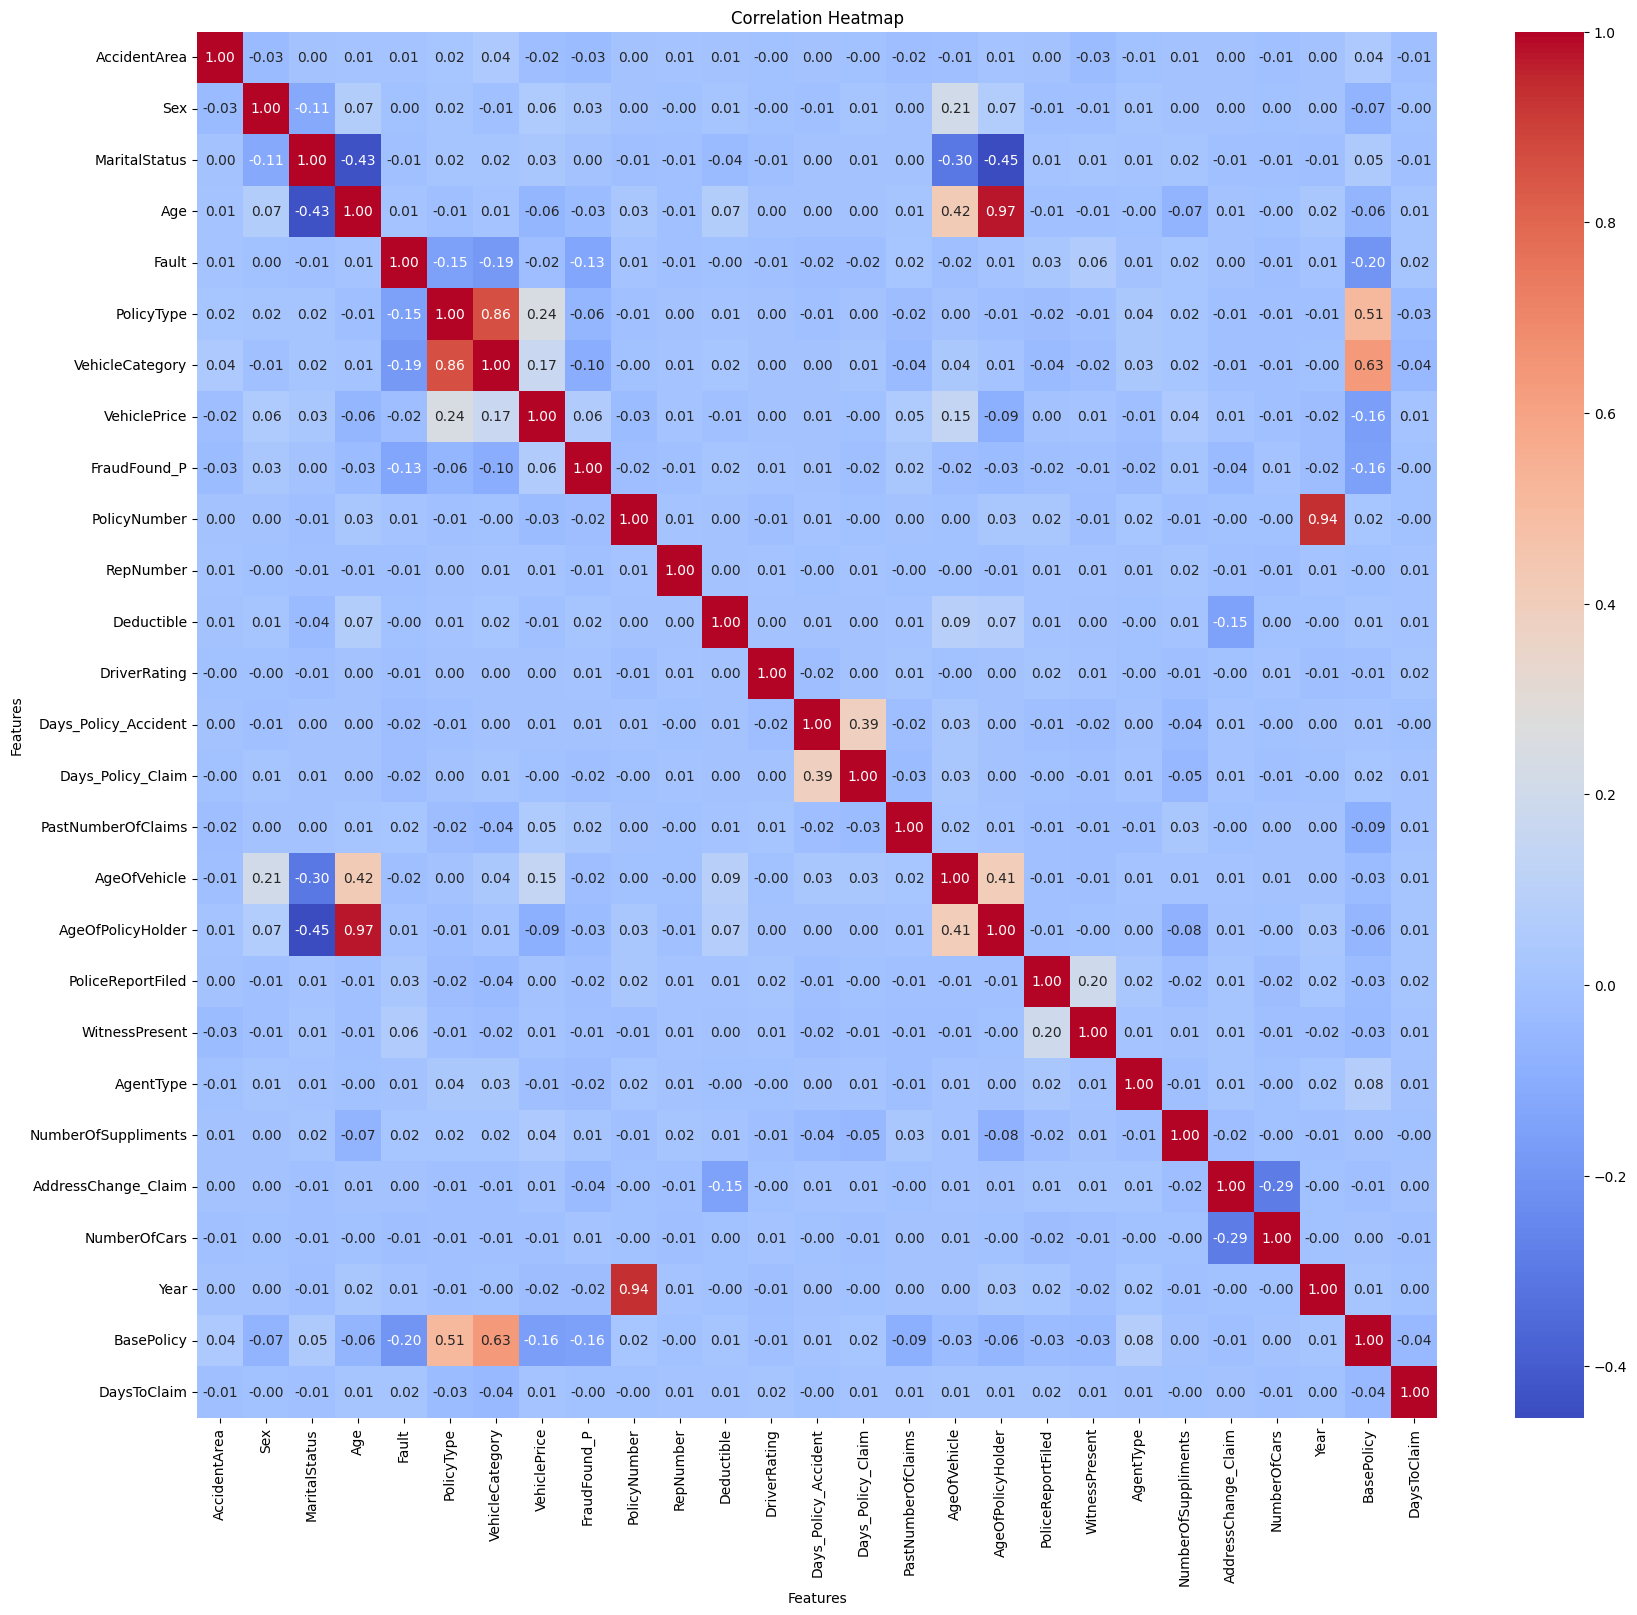

In [76]:
numeric_df = df

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(20, 18))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

X=df
X_features = X.drop(columns=['FraudFound_P'])

# Select the top 5 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X_features, X['FraudFound_P'])

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_features.columns[selected_indices]


In [55]:
print(selected_features)

Index(['AccidentArea', 'Sex', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'Deductible', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')


In [80]:
selected_features.append(df['FraudFound_P'])


TypeError: all inputs must be Index

In [43]:
df.describe()

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,DaysToClaim
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.00000,...,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,0.896426,0.843051,1.303327,39.858292,0.271743,1.260717,0.398210,1.291588,0.059861,7710.90168,...,4.892211,0.027758,0.005642,0.015630,2.003308,2.888514,0.098839,1994.866528,1.036384,51.639536
std,0.304716,0.363765,0.475113,13.488996,0.444872,1.190994,0.538864,1.837352,0.237237,4451.37980,...,1.395396,0.164284,0.074906,0.124043,1.110652,0.451095,0.383484,0.803309,0.782336,120.942891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3856.50000,...,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,38.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7711.00000,...,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000,7.000000
75%,1.000000,1.000000,2.000000,48.000000,1.000000,2.000000,1.000000,1.000000,0.000000,11565.50000,...,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000,18.000000
max,1.000000,1.000000,3.000000,80.000000,1.000000,8.000000,2.000000,5.000000,1.000000,15420.00000,...,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000,419.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AccidentArea          15419 non-null  int64
 1   Sex                   15419 non-null  int32
 2   MaritalStatus         15419 non-null  int32
 3   Age                   15419 non-null  int64
 4   Fault                 15419 non-null  int32
 5   PolicyType            15419 non-null  int32
 6   VehicleCategory       15419 non-null  int32
 7   VehiclePrice          15419 non-null  int32
 8   FraudFound_P          15419 non-null  int64
 9   PolicyNumber          15419 non-null  int64
 10  RepNumber             15419 non-null  int64
 11  Deductible            15419 non-null  int64
 12  DriverRating          15419 non-null  int64
 13  Days_Policy_Accident  15419 non-null  int32
 14  Days_Policy_Claim     15419 non-null  int32
 15  PastNumberOfClaims    15419 non-null  int32
 16  AgeO

In [47]:
df.to_csv('fraud_oracle.csv', index=False)

In [58]:
print(df[selected_features])

       AccidentArea  Sex  Age  Fault  PolicyType  VehicleCategory  \
0                 1    0   21      0           5                1   
1                 1    1   34      0           4                1   
2                 1    1   47      0           4                1   
3                 0    1   65      1           2                1   
4                 1    0   27      1           4                1   
...             ...  ...  ...    ...         ...              ...   
15414             1    1   35      0           1                0   
15415             1    1   30      0           2                1   
15416             0    1   24      0           1                0   
15417             1    0   34      1           0                0   
15418             1    1   21      0           1                0   

       VehiclePrice  PolicyNumber  Deductible  Days_Policy_Claim  \
0                 5             1         300                  2   
1                 5             2  

In [56]:
print(selected_features)

Index(['AccidentArea', 'Sex', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'Deductible', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')


In [81]:
# Assuming df is your DataFrame and selected_features is your list of selected column names
columns_to_drop = df.columns.difference(selected_features)

print(columns_to_drop)


Index(['DaysToClaim', 'Days_Policy_Accident', 'DriverRating', 'FraudFound_P',
       'MaritalStatus', 'RepNumber', 'WitnessPresent'],
      dtype='object')


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AccidentArea         15419 non-null  int64
 1   Sex                  15419 non-null  int32
 2   Age                  15419 non-null  int64
 3   Fault                15419 non-null  int32
 4   PolicyType           15419 non-null  int32
 5   VehicleCategory      15419 non-null  int32
 6   VehiclePrice         15419 non-null  int32
 7   PolicyNumber         15419 non-null  int64
 8   Deductible           15419 non-null  int64
 9   Days_Policy_Claim    15419 non-null  int32
 10  PastNumberOfClaims   15419 non-null  int32
 11  AgeOfVehicle         15419 non-null  int32
 12  AgeOfPolicyHolder    15419 non-null  int32
 13  PoliceReportFiled    15419 non-null  int32
 14  AgentType            15419 non-null  int32
 15  NumberOfSuppliments  15419 non-null  int32
 16  AddressChange_Claim  1

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AccidentArea         15419 non-null  int64
 1   Sex                  15419 non-null  int32
 2   Age                  15419 non-null  int64
 3   Fault                15419 non-null  int32
 4   PolicyType           15419 non-null  int32
 5   VehicleCategory      15419 non-null  int32
 6   VehiclePrice         15419 non-null  int32
 7   PolicyNumber         15419 non-null  int64
 8   Deductible           15419 non-null  int64
 9   Days_Policy_Claim    15419 non-null  int32
 10  PastNumberOfClaims   15419 non-null  int32
 11  AgeOfVehicle         15419 non-null  int32
 12  AgeOfPolicyHolder    15419 non-null  int32
 13  PoliceReportFiled    15419 non-null  int32
 14  AgentType            15419 non-null  int32
 15  NumberOfSuppliments  15419 non-null  int32
 16  AddressChange_Claim  1

In [64]:
# Assuming df is your DataFrame and 'column_name' is the name of the column you want to drop
df.drop(columns='PolicyNumber', inplace=True)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AccidentArea         15419 non-null  int64
 1   Sex                  15419 non-null  int32
 2   Age                  15419 non-null  int64
 3   Fault                15419 non-null  int32
 4   PolicyType           15419 non-null  int32
 5   VehicleCategory      15419 non-null  int32
 6   VehiclePrice         15419 non-null  int32
 7   Deductible           15419 non-null  int64
 8   Days_Policy_Claim    15419 non-null  int32
 9   PastNumberOfClaims   15419 non-null  int32
 10  AgeOfVehicle         15419 non-null  int32
 11  AgeOfPolicyHolder    15419 non-null  int32
 12  PoliceReportFiled    15419 non-null  int32
 13  AgentType            15419 non-null  int32
 14  NumberOfSuppliments  15419 non-null  int32
 15  AddressChange_Claim  15419 non-null  int32
 16  NumberOfCars         1

In [66]:
df.to_csv('fraud_oracle.csv', index=False)

In [83]:
# Assuming index_values is your index and value_to_remove is the value you want to remove
#index_values = ['DaysToClaim', 'Days_Policy_Accident', 'DriverRating', 'FraudFound_P', 'MaritalStatus', 'RepNumber', 'WitnessPresent']
value_to_remove = 'FraudFound_P'  # Example value to remove

# Create a new index excluding the value to remove
drop_columns = [value for value in columns_to_drop if value != value_to_remove]

# Print the new index
print(drop_columns)


['DaysToClaim', 'Days_Policy_Accident', 'DriverRating', 'MaritalStatus', 'RepNumber', 'WitnessPresent']


In [84]:
df.drop(columns=drop_columns, inplace=True)

In [85]:
df

,AccidentArea,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,Deductible,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,1,0,21,0,5,1,5,0,1,300,...,3,1,3,0,0,3,0,2,1994,2
1,1,1,34,0,4,1,5,0,2,400,...,3,4,4,1,0,3,3,0,1994,1
2,1,1,47,0,4,1,5,0,3,400,...,0,5,6,0,0,3,3,0,1994,1
3,0,1,65,1,2,1,0,0,4,400,...,0,6,7,1,0,2,3,0,1994,2
4,1,0,27,1,4,1,5,0,5,400,...,3,3,4,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,1,1,35,0,1,0,0,1,15416,400,...,1,4,4,0,0,3,3,0,1996,1
15415,1,1,30,0,2,1,1,0,15417,400,...,2,4,4,0,0,2,3,2,1996,2
15416,0,1,24,0,1,0,0,1,15418,400,...,2,3,3,0,0,0,3,0,1996,1
15417,1,0,34,1,0,0,0,0,15419,400,...,3,0,4,0,0,2,3,0,1996,0


In [86]:
df.drop(columns='PolicyNumber',inplace=True)

In [87]:
df

,AccidentArea,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,1,0,21,0,5,1,5,0,300,2,3,1,3,0,0,3,0,2,1994,2
1,1,1,34,0,4,1,5,0,400,2,3,4,4,1,0,3,3,0,1994,1
2,1,1,47,0,4,1,5,0,400,2,0,5,6,0,0,3,3,0,1994,1
3,0,1,65,1,2,1,0,0,400,2,0,6,7,1,0,2,3,0,1994,2
4,1,0,27,1,4,1,5,0,400,2,3,3,4,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,1,1,35,0,1,0,0,1,400,2,1,4,4,0,0,3,3,0,1996,1
15415,1,1,30,0,2,1,1,0,400,2,2,4,4,0,0,2,3,2,1996,2
15416,0,1,24,0,1,0,0,1,400,2,2,3,3,0,0,0,3,0,1996,1
15417,1,0,34,1,0,0,0,0,400,2,3,0,4,0,0,2,3,0,1996,0


In [88]:
df.to_csv('fraud_oracle.csv', index=False)